## Sample notebook to plot lightcurve from CZTI event file

### Load modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Load event file with astropy

Provide the path to the czti events file in the same format as given in the example below.

In [2]:
path = "/app/notebooks/Final_winterschool_xray_tutorial_material/"
filename = "AS1A02_005T01_9000000948_06884cztM0_level2_common_clean.evt"

dataHDU = fits.open(path + filename)

### Combine data from all quadtrants

CZTI contains four quadrants, here we obtain the time value for each quadrant and combine the data for them.

In [3]:
times = np.concatenate((dataHDU[1].data['Time'], dataHDU[2].data['Time'],
                        dataHDU[3].data['Time'], dataHDU[4].data['Time']))

### Make histogram and plot light curve

Setting binsize for each interval and accumulate counts in each of them using histogram and plotting it. 

Text(0, 0.5, '$counts\\ s^{-1}$')

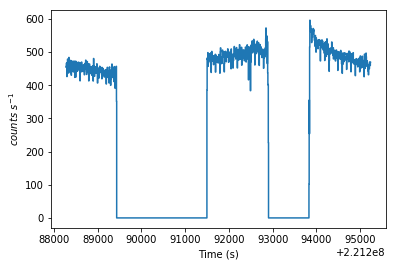

In [4]:
# Define timebins
binsize = 5  
tbins = np.arange(times.min(), times.max(), binsize)

# Make histogoram
counts, bins = np.histogram(times, bins=tbins)
bins = (bins[1:] + bins[:-1])/2

# Plot
plt.plot(bins, counts/binsize, ls='steps-mid')
plt.xlabel('Time (s)')
plt.ylabel('$counts\ s^{-1}$')

# Searching for GRB in Data

By zooming in or trimming a portion of the data, we are looking for any possibility of GRB. Here you can play with binsize value and mark the difference.

Text(0, 0.5, '$counts\\ s^{-1}$')

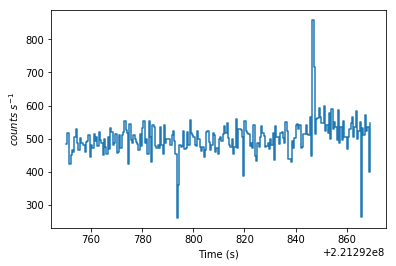

In [5]:
binsize =0.5 # try binsize=1
tbins = np.arange(221292750.0, 221292870.0, binsize)

counts, bins = np.histogram(times, bins=tbins)
bins = (bins[1:] + bins[:-1])/2


plt.plot(bins, counts/binsize, ls='steps-mid')
plt.xlabel('Time (s)')
plt.ylabel('$counts\ s^{-1}$')


The sharp peak observed here accounts for the observed GRB. Change the binsize to 1, to see the shoulder of the GRB.